# Sesi 14

Unsupervised Learning
- Dimensionality Reduction
- Clustering

# PCA

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
bc = load_breast_cancer()

In [3]:
bc_data = bc.data

In [5]:
bc_data[0:1]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

In [6]:
bc_labels = bc.target

In [7]:
bc_labels[0:5]

array([0, 0, 0, 0, 0])

In [8]:
import numpy as np

labels = np.reshape(bc_labels, (569, 1))

In [10]:
final_breast_data = np.concatenate([bc_data, labels], axis=1)

In [11]:
import pandas as pd

In [12]:
breast_dataset = pd.DataFrame(final_breast_data)

In [13]:
breast_dataset.head(3)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0


In [14]:
features = bc.feature_names

In [16]:
features_labels = np.append(features, 'label')

In [18]:
breast_dataset.columns = features_labels

In [19]:
breast_dataset.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0


In [24]:
breast_dataset['label'].replace(0, 'Benign', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)

In [25]:
breast_dataset.tail(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.152,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.265,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.000,0.2871,0.07039,Malignant


In [26]:
from sklearn.preprocessing import StandardScaler

x = breast_dataset.loc[:, features].values

In [29]:
x = StandardScaler().fit_transform(x)

In [30]:
normalised_breast = pd.DataFrame(x)
normalised_breast.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [31]:
from sklearn.decomposition import PCA

pca_breast = PCA(n_components=2)
principalComp_breast = pca_breast.fit_transform(x)

In [34]:
pc_breast_df = pd.DataFrame(data=principalComp_breast,
                            columns=[
                                'principal component 1',
                                'principal component 2'
                            ])

In [35]:
pc_breast_df.head()

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [37]:
pca_breast.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [38]:
# Visualisasi

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

<Figure size 432x288 with 0 Axes>

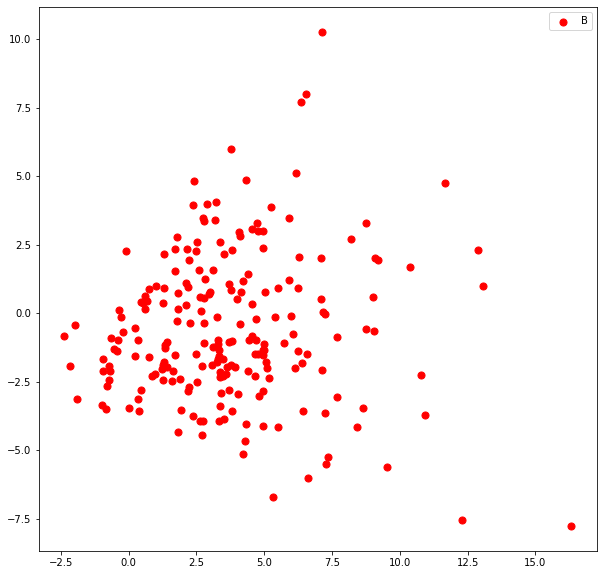

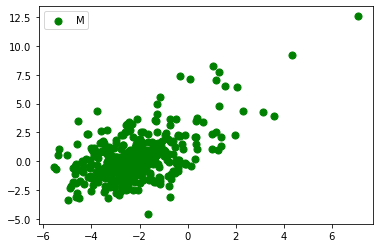

In [40]:
plt.figure()
plt.figure(figsize=(10,10))
target = ['Benign', 'Malignant']
colors = ['r', 'g']

for target, color in zip(target, colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(pc_breast_df.loc[indicesToKeep, 'principal component 1'],
               pc_breast_df.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 50)
    
    plt.legend(target)
    plt.show()

# K-Means Clustering

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

%matplotlib inline

In [42]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')

In [43]:
data.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [44]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

In [46]:
data_scaled

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [49]:
kmeans = KMeans(n_clusters=2, init='k-means++') #max_iter=300

kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [50]:
kmeans.inertia_

2599.3873849123056

In [51]:
SSE = []

for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster,
                   init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

In [52]:
frame = pd.DataFrame({'Cluster': range(1, 20),
                     'SSE': SSE})

In [53]:
frame.head()

,Cluster,SSE
0,1,3520.000000
1,2,2599.384424
2,3,2149.283956
3,4,1837.715058
4,5,1546.381211


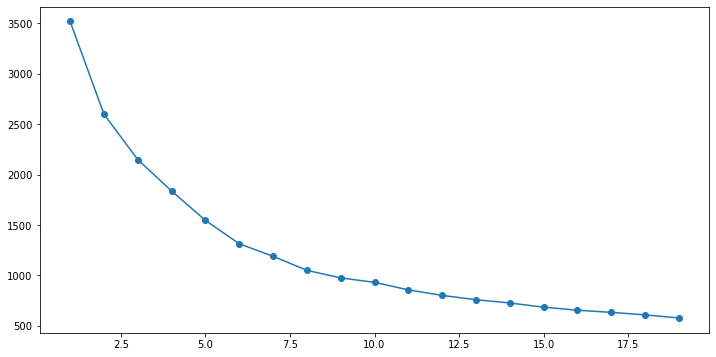

In [55]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],
        frame['SSE'],
        marker='o',)

In [56]:
kmeans = KMeans(n_clusters=6, init='k-means++') #max_iter=300

kmeans.fit(data_scaled)

KMeans(n_clusters=6)

In [57]:
pred = kmeans.predict(data_scaled)

In [58]:
frame_pred = pd.DataFrame(data_scaled)
frame_pred['cluster'] = pred

In [59]:
frame_pred

,0,1,2,3,4,5,6,7,cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,2
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,2
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1


In [60]:
frame_pred['cluster'].value_counts()

1    172
0    124
5     86
2     46
3     11
4      1
Name: cluster, dtype: int64

## Save and Load Models

In [61]:
import pickle

In [64]:
pickle.dump(kmeans, open('model_kmeans.sav', 'wb'))